# Insurance Lapse Data Cleaning File
This file is the cleaned data file, a combination of the previous data cleaning file
This includes data inspection, cleaning, filtering, transformation, and NA values imputation. 

## Loading the raw dataset and starting basic inspection

In [2]:
# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warnings, suppresing all warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the background of the plots to white
sns.set_style('whitegrid')

In [5]:
# reading the dataset
df = pd.read_csv('insurance_data.csv')
df.head(10)

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,BENEFIT,NON LAPSE GUARANTEED,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date
0,1,1,1,36,F,1,1,A,Annually,Inforce,200000.0,NO NLG,0.0,0,0.0,N,8.000000,9,280.0,11-Aug
1,1,1,1,42,M,1,2,A,Annually,Inforce,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,200.0,11-Aug
2,1,1,2,40,M,2,3,A,Annually,Lapse,80000.0,NO NLG,0.0,0,0.0,N,8.000000,9,1289.0,11-Aug
3,1,1,3,39,M,1,2,A,Monthly,Lapse,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,216.0,11-Aug
4,1,1,4,44,M,1,2,A,Annually,Lapse,100000.0,NO NLG,0.0,0,0.0,N,7.916667,8,140.0,11-Sep
5,1,1,1,36,M,2,3,A,Monthly,Lapse,40000.0,NO NLG,0.0,0,0.0,N,7.916667,8,336.0,11-Sep
6,1,1,1,50,F,2,3,A,Monthly,Lapse,20000.0,NO NLG,0.0,0,0.0,N,7.916667,8,537.0,11-Sep
7,1,1,5,42,M,1,2,A,Annually,Lapse,100000.0,NO NLG,0.0,0,0.0,N,7.916667,8,200.0,11-Sep
8,1,1,2,37,M,2,3,A,Annually,Lapse,20000.0,NO NLG,0.0,0,0.0,N,7.833333,8,82.0,11-Oct
9,1,1,3,34,F,2,3,A,Annually,Lapse,20000.0,NO NLG,0.0,0,0.0,N,7.833333,8,73.0,11-Oct


In [8]:
# checking the different columns of the datasets
df.columns
# format the columsn names to be upper case for consistenct
df.columns = df.columns.str.upper()
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'FULL BENEFIT?',
       'POLICY YEAR (DECIMAL)', 'POLICY YEAR', 'PREMIUM', 'ISSUE DATE'],
      dtype='str')

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 185560 entries, 0 to 185559
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CHANNEL1                   185560 non-null  int64  
 1   CHANNEL2                   185560 non-null  int64  
 2   CHANNEL3                   185560 non-null  int64  
 3   ENTRY AGE                  185560 non-null  int64  
 4   SEX                        185560 non-null  str    
 5   POLICY TYPE 1              185560 non-null  int64  
 6   POLICY TYPE 2              185560 non-null  int64  
 7   POLICY TYPE 3              185560 non-null  str    
 8   PAYMENT MODE               185560 non-null  str    
 9   POLICY STATUS              185560 non-null  str    
 10  BENEFIT                    161896 non-null  float64
 11  NON LAPSE GUARANTEED       185560 non-null  str    
 12  SUBSTANDARD RISK           185560 non-null  float64
 13  NUMBER OF ADVANCE PREMIUM  185560 non-nu

In [10]:
df.shape

(185560, 20)

## Columns Name Definition
Realizing that there are some abnormal datapoints for some undefined columns, it's important we understand the columns better. Since some of the columns are in the insurace context, it is important to understand their definition beforehand for clearer and easier analysis. 

Here is a list of analysis on columns name. For this sections, we will first exploring the types of values available in each columns, and then proceed with defining them based on their values. 

### CHANNEL variables inspection
According to insurance context, insurance companies track Distribution Channels to see **which sales methods are most profitable or prone to "churn" (lapsing)**. Having three separate channel columns suggests a hierarchical distribution model:

(1) Channel 1 (The Broad Category): Likely represents the highest level of sales. For example: 1 = Agency, 2 = Direct-to-Consumer, 3 = Bancassurance (sold through banks).

(2) Channel 2 (The Specific Entity): This might identify the specific branch or region. For instance, if Channel 1 is "Agency," Channel 2 might differentiate between "Independent Agents" vs. "Captive Agents."

(3) Channel 3 (The Producer): This often identifies the specific broker group or the specific marketing campaign that brought the lead in.

While this is the possible explanation and interpretation of each channel, the dataset lack clear definition in terms of the information these columns provided. This might be useful in producing an interpretable model, but we should not leave them out since they might carry information that contributes to prediction accuracy. 

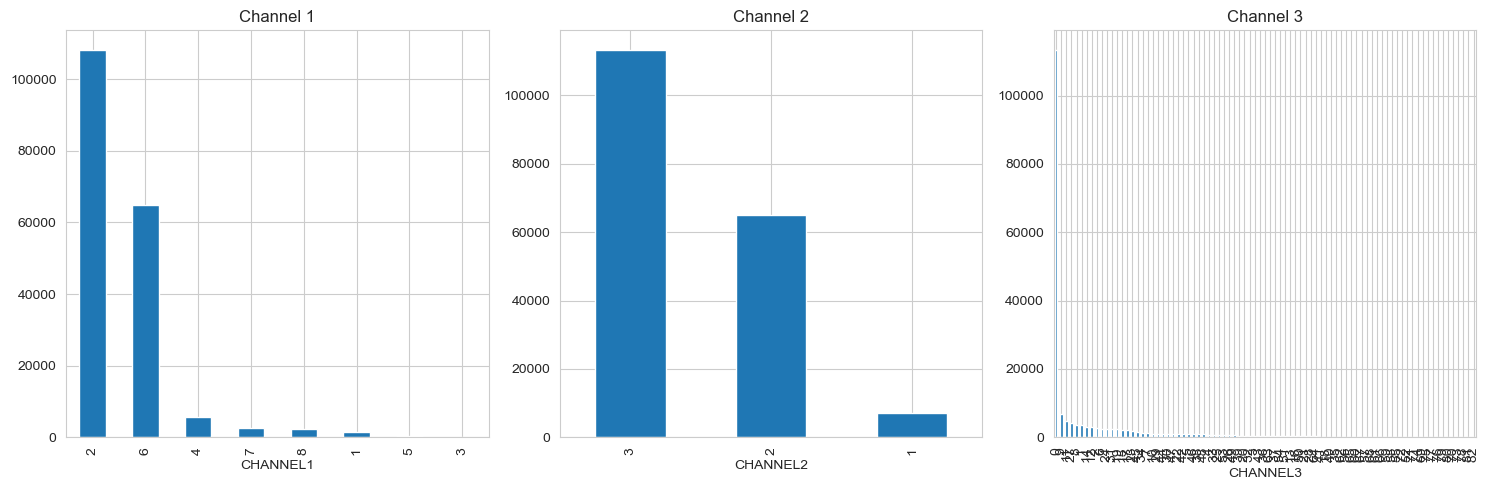

In [ ]:
# inspecting the channel variables - CHANNEL1, CHANNEL2, CHANNEL3
# Plot Channel 1,2,3 out to see their values

# 1. Create a single figure with 3 subplots (axes)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 2. Assign each plot to a specific axis using the 'ax' parameter
df['CHANNEL1'].value_counts().plot(kind='bar', ax=axes[0], title='Channel 1')
df['CHANNEL2'].value_counts().plot(kind='bar', ax=axes[1], title='Channel 2')
df['CHANNEL3'].value_counts().plot(kind='bar', ax=axes[2], title='Channel 3')

# 3. Clean up the layout so labels don't overlap
plt.tight_layout()
plt.show()


### SEX, ENTRY AGE, PAYMENT METHOD
**(1) Sex:**

Intuitive definition. This dataset only categorizes individuals into male and female. Based on the first bar chart below, there is more male compared to female within this dataset, but not significantly different. 

**(2) Age:**

Intuitive definition, shown by the histogram in the second picture. Most individuals are centered at the adult age (20 - 50), followed by child/babies and then the least is the elderly (60-70). This makes sense because adult is mostly working, have family and property, which is likely to exposed themselves to higher and more variety of risk levels, causing them to buy more insurance policies. The least is the elderly, which also make sense because elderly are exposed to higher life-related risk due to health and sickness, hence less insurance firms are willing to offer policies to them. There is no datapoint beyond age 70, because according to the US insurance policy, the maximum application ages typicaly ranging from 75-80, so it is highly likely that no insurance firms are willing to take excessive risk to insure applicants beyond 70. 

**(3) Policy Year (Decimal):**

How long the policies have been in active (POLICY STATUS = INFORCE till the current date)

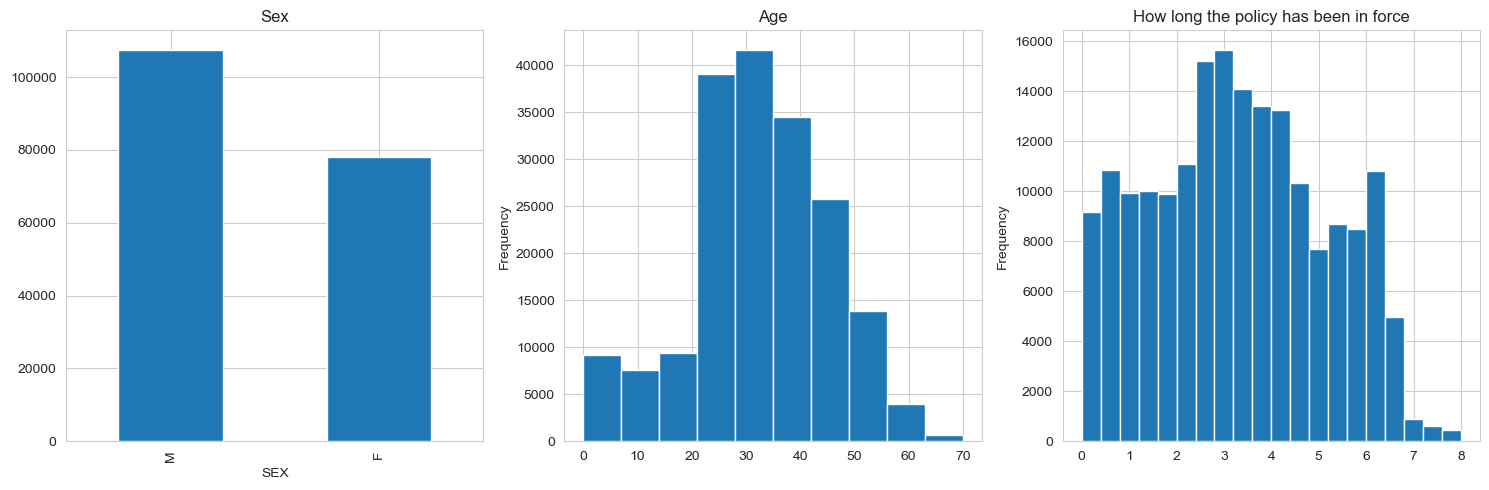

In [31]:
# inspecting the sex, age, payment method

# 1. Create a single figure with 3 subplots (axes)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 2. Assign each plot to a specific axis using the 'ax' parameter
df['SEX'].value_counts().plot(kind='bar', ax=axes[0], title='Sex')
df['ENTRY AGE'].plot(kind='hist', ax=axes[1], title='Age', bins=10)
df['POLICY YEAR (DECIMAL)'].plot(kind='hist', ax=axes[2], title='How long the policy has been in force', bins=20)

# 3. Clean up the layout so labels don't overlap
plt.tight_layout()
plt.show()


### POLICY STATUS, NON LAPSE GUARANTEED, SUBSTANDARD RISK

**(1) Policy Status:**

A. Inforce (Active)
- The policy is active and performing.
- Definition: The contract is in full effect, premiums are being paid (or the policy is paid-up), and the insurer is currently providing coverage.
- Modeling Role: In a Cox model, these are Censored observations because the "event" (lapse) has not happened yet as of the data snapshot.

B. Lapse (Passive Termination)
- The policy has terminated due to non-payment of premiums.
- Definition: The policyholder stopped paying, and the "grace period" (usually 30–61 days) has expired. The policy is canceled by the company, and typically, no death benefit or cash value is paid out.
- Behavioral Driver: Often linked to financial distress, forgetfulness, or "buyer's remorse" early in the policy life.

C. Surrender (Active Termination)
- The policyholder voluntarily terminates the contract to collect the Cash Value.
- Definition: This applies primarily to "Permanent" or "Whole Life" policies that build equity. The policyholder explicitly asks to cancel the policy in exchange for the "Surrender Value" (the accumulated savings minus fees).
- Behavioral Driver: Often a strategic financial decision—the policyholder needs cash for an emergency, is switching to a different investment, or no longer needs the coverage.

D. Expired (Natural Maturity)
- The policy reached its contractual end date.
- Definition: Most common in "Term Life" insurance. If you buy a 20-year term policy and stay alive for 20 years, the policy "expires." No benefit is paid, and the contract simply ends.
- Modeling Role: These are Censored. They didn't "quit"; they finished the marathon.

E. Death (Claim Paid)
- The insured event occurred, and the company paid the death benefit.
- Definition: The policy fulfilled its primary purpose. The contract is terminated because the claim was settled.
- Modeling Role: In survival analysis, this is a Competing Risk. A person cannot "Lapse" a policy if they are already deceased.

*In this experiment, our goal is to predict LAPSE vs NON-LAPSE (binary). Hence, we should cosider regrouping the variables into only two cateogories. LAPSE includes Lapse and Surrender, active and voluntary termination; NON-LAPSE includes INFORCE, EXPIRED, DEATH, passive and involuntary termination.*

**(2) Non-Lapse Guaranteed**

*A policy feature that ensures the death benefit remains in force even if the policy's cash value drops to zero, provided a specific premium requirement is met.*

A. NLG Suspend
- Meaning: The guarantee has been temporarily paused or "suspended." This typically happens when a policyholder misses a required premium payment or takes a policy loan that violates the guarantee's specific terms.
- Relationship to Lapse: This category shows a lapse rate of 1.0 (100%) in your chart. This indicates that once the safety net of the NLG is suspended, the policy is extremely vulnerable and, in your current data sample, almost always results in a lapse.


B. NLG Active
- Meaning: The guarantee is fully functional. The policyholder is meeting all premium requirements, and the insurance company is contractually obligated to keep the policy active regardless of cash value performance.
- Relationship to Lapse: Interestingly, this group has a high lapse rate (approx. 0.82). This suggests that even with a guarantee in place, a large portion of these policyholders are either choosing to walk away or failing to meet the basic premium payments required to keep the "Active" status.


C. NO NLG **(Majority of the policy)**
- Meaning: These are standard policies that do not have the Non-Lapse Guarantee feature. The policy stays active only as long as there is enough cash value to cover the monthly insurance costs.
- Relationship to Lapse: This group has a moderate lapse rate (approx. 0.63). They are actually lapsing less frequently than those with an "Active" NLG, which might imply these policies have more stable cash values or more traditional payment structures.


D. NLG Not Active
- Meaning: This likely refers to policies that could have had the guarantee, but it was never triggered or the policy did not qualify for it at the time of the data snapshot.
- Relationship to Lapse: This category has the lowest lapse rate (approx. 0.37). These policyholders appear to be the most stable group in your dataset, potentially because they are maintaining their policies through traditional cash value accumulation rather than relying on the guarantee feature.

**(3) Substandard Risk**

The extra mortality risk a policyholder carries compared to a "Standard" individual. The substandard risk must always be positive. Negative value is non-existent in standard substandard tables, as you cannot realistically model a risk lower than the "Preferred" floor already built into the product's pricing. If an individual is healthier than the average person, they aren't labeled as "Negative Substandard." Instead, they are placed into Preferred or Super Preferred categories.

1.25% of the policies have negative standard risk score, which is a small proportion. Since substandard risk must be >=0, we suspect negative values to be a typo, hence will drop these values.


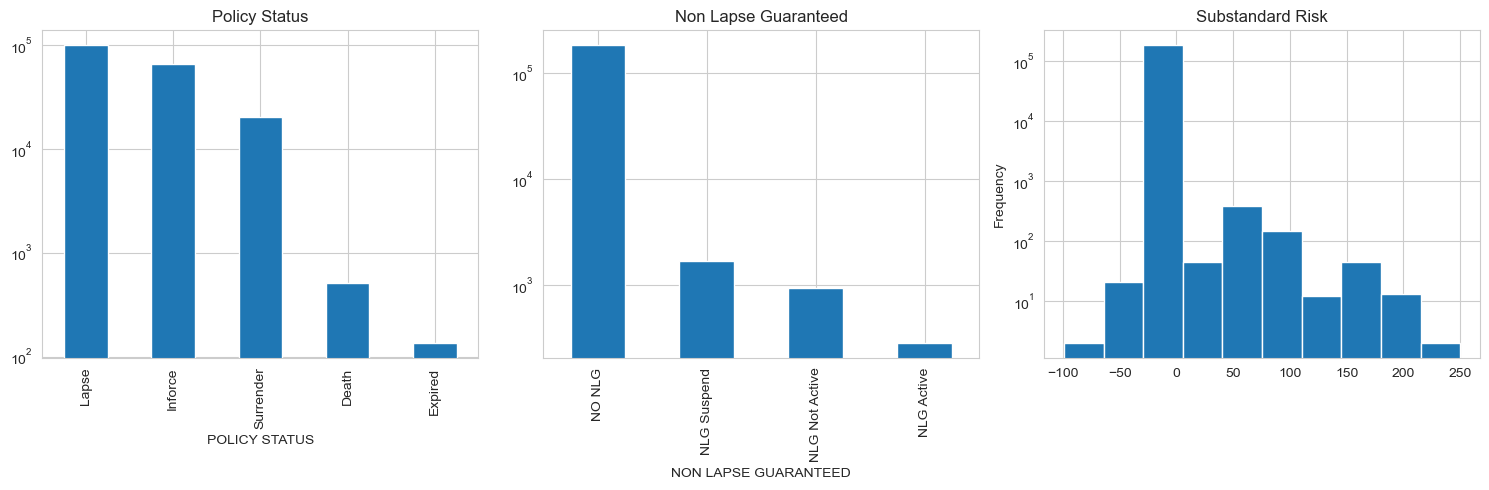

In [ ]:
# Inspecting POLICY STATUS, NON LAPSE GUARANTEED, SUBSTANDARD RISK

# 1. Create a single figure with 3 subplots (axes)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 2. Assign each plot to a specific axis using the 'ax' parameter
df['POLICY STATUS'].value_counts().plot(kind='bar', ax=axes[0], title='Policy Status', logy=True)
# logy=TRUE is added to pull up the height of the low frequency x values to make it easier to see the distribution of the data, as there are some categories with very low frequency compared to others.

df['NON LAPSE GUARANTEED'].value_counts().plot(kind='bar', ax=axes[1], title='Non Lapse Guaranteed', logy=True)
df['SUBSTANDARD RISK'].plot(kind='hist', ax=axes[2], title='Substandard Risk', bins=10, logy=True)

# 3. Clean up the layout so labels don't overlap
plt.tight_layout()
plt.show()


In [ ]:
# Check how many policies/proportion has negative standard risk score
df_negative = df[df['SUBSTANDARD RISK']<0]
df_negative.shape[0]/ df.shape[0]*100

# 1.25% of the policies have negative standard risk score, which is a small proportion. 
# Since substandard risk must be >=0, we suspect negative values to be a typo, hence will drop these values.

0.012394912696701876

### BENEFIT, INITIAL BENEFIT, FULL BENEFIT?
**(1) INITIAL BENEFIT**

This is the original face amount of the insurance policy at the time it was first issued. It represents the starting death benefit or coverage level agreed upon when the contract was signed.

**(2) BENEFIT**
This represents the current death benefit or total coverage amount as of the date of the data snapshot.
- Why it differs from Initial: In many life insurance products (like Universal Life or Whole Life), the benefit can grow over time due to paid-up additions, inflation adjustments, or accumulated dividends.
- Current Value: It is the actual amount that would be paid out if a claim were made today.

**(3) FULL BENEFIT?**
This is likely a binary indicator (Yes/No or 1/0) that identifies whether the policy has reached its maximum potential coverage or a specific milestone.

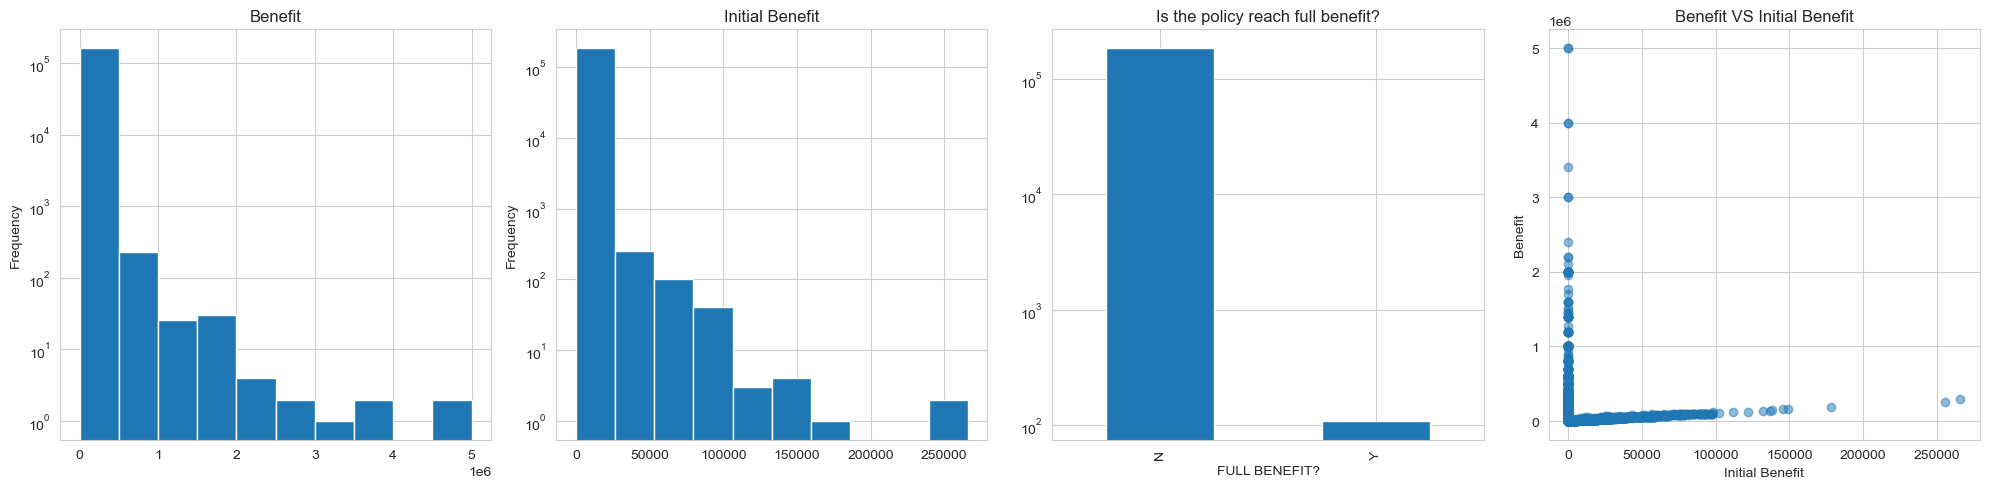

In [53]:
# inspecting the sex, age, payment method

# 1. Create a single figure with 4 subplots (axes)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2. Assign each plot to a specific axis using the 'ax' parameter
df['BENEFIT'].plot(kind='hist', ax=axes[0], title='Benefit', bins=10, logy=True)
df['INITIAL BENEFIT'].plot(kind='hist', ax=axes[1], title='Initial Benefit', bins=10, logy=True)
df['FULL BENEFIT?'].value_counts().plot(kind='bar', ax=axes[2], title='Is the policy reach full benefit?', logy=True)

# Use the axis object directly to plot the scatter
axes[3].scatter(df['INITIAL BENEFIT'], df['BENEFIT'], alpha=0.5)
axes[3].set_title('Benefit VS Initial Benefit')
axes[3].set_xlabel('Initial Benefit')
axes[3].set_ylabel('Benefit')

# 3. Clean up the layout and show once
plt.tight_layout()
plt.show()


In [ ]:
df['FULL BENEFIT?'].value_counts()
# 90% of the policies have reached full benefit, which is expected as the dataset is from a insurance company and they would want to retain customers until they reach full benefit.

FULL BENEFIT?
N    185451
Y       109
Name: count, dtype: int64

### PREMIUM, NUMBER OF ADVANCE PREMIUM, PAYMENT MODE
**(1) PREMIUM**

This is the specific dollar amount the policyholder is required to pay to keep the insurance policy active. It is based on the risk level (like the "Substandard Risk" we discussed), the "Benefit" amount, and the age of the individual.

**(2) NUMBER OF ADVANCE PREMIUM**

This indicates how many future premium payments the policyholder has paid in advance of their actual due dates. Some policyholders prefer to pay for several months or years at once to ensure the policy doesn't lapse if they forget a payment.

**(3) PAYMENT MODE**

This describes the frequency at which the premium payments are made. Typically, policies paid "Annually" have lower lapse rates than those paid "Monthly," as there are fewer opportunities for a payment to be missed.

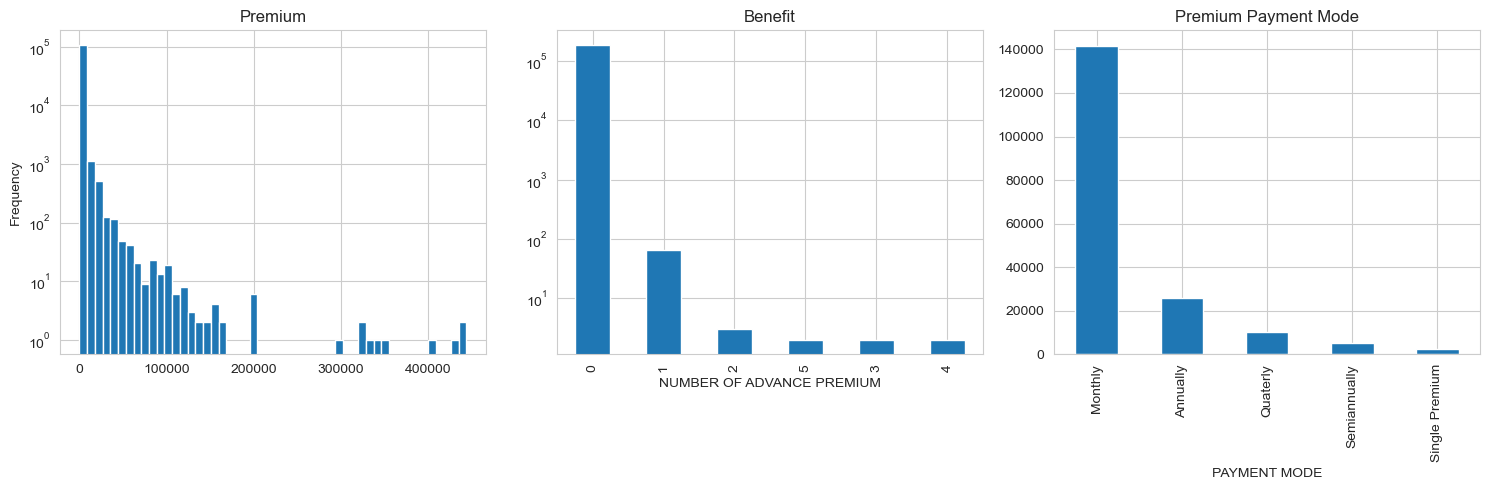

In [52]:
# inspecting the sex, age, payment method

# 1. Create a single figure with 3 subplots (axes)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 2. Assign each plot to a specific axis using the 'ax' parameter
df['PREMIUM'].plot(kind='hist', ax=axes[0], title='Premium', bins=50, logy=True)
df['NUMBER OF ADVANCE PREMIUM'].value_counts().plot(kind='bar', ax=axes[1], title='Benefit', logy=True)
df['PAYMENT MODE'].value_counts().plot(kind='bar', ax=axes[2], title='Premium Payment Mode')

# 3. Clean up the layout so labels don't overlap
plt.tight_layout()
plt.show()

### POLICY TYPE variables inspection
In the insurance context, insurance products are rarely just one thing; they are usually a base plan with various riders or specific **internal classifications**.

(1) Policy Type 1 (Product Class): This is likely the "Big Picture" product line.
Example: 1 = Term Life, 2 = Whole Life, 3 = Universal Life.

(2) Policy Type 2 (Sub-Product/Plan): Within a class, there are different variations.
Example: If Type 1 is "Term Life," Type 2 might be 1 = 10-year term or 2 = 20-year term.

(3) Policy Type 3 (Risk or Premium Class): This often correlates with the "Non-Lapse Guaranteed" (NLG) column or the "Benefit" amount. It might represent the specific underwriting tier or the specific dividend structure of the policy.

While this is the possible explanation and interpretation of each channel, the dataset lack clear definition in terms of the information these columns provided. This might be useful in producing an interpretable model, but we should not leave them out since they might carry information that contributes to prediction accuracy. 

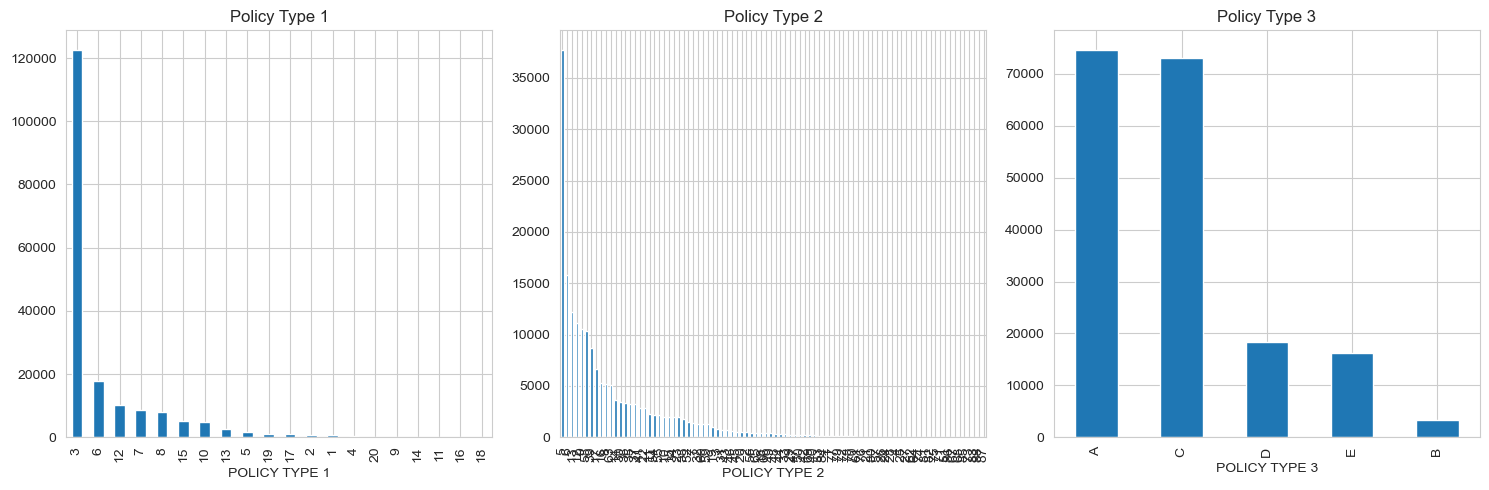

In [16]:
# inspecting the policy type variables - POLICY TYPE 1, POLICY TYPE 2, POLICY TYPE 3
# 1. Create a single figure with 3 subplots (axes)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 2. Assign each plot to a specific axis using the 'ax' parameter
df['POLICY TYPE 1'].value_counts().plot(kind='bar', ax=axes[0], title='Policy Type 1')
df['POLICY TYPE 2'].value_counts().plot(kind='bar', ax=axes[1], title='Policy Type 2')
df['POLICY TYPE 3'].value_counts().plot(kind='bar', ax=axes[2], title='Policy Type 3')

# 3. Clean up the layout so labels don't overlap
plt.tight_layout()
plt.show()

## NA Values Checking and Imputation

## Data Transformation